# My Project Title

## Introduction
I will analyze some life style and academic habits and how they may impact a student's final exam score.

## Analysis
### Importing
I imported the data from a CSV file that I downloaded from Kaggle. It contains various pieces of information regarding factors that may impact the success of a student on a course's final evaluation. Each row represents a different student participating a course, and each column has different information about the students, one of which is the final exam score for the course the student is taking. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv("StudentPerformanceFactors.csv")
# Creating a data frame using the data set imported from the StudentPerformanceFactors.csv file, and assigning it to a variable called 'data'

### Cleaning Data and Manipulation
The data set didn't have any missing values so I didn't have to clean any missing values out of the dataset. There is a lot of extra columns that I won't need for my analysis so I'll remove them from the data frame that I'm working with. I've decided to explore the relationship between previous exam scores and motivation level, as well as how the two impact final exam scores.

In [2]:
data = data.reindex(['Previous_Scores','Motivation_Level','Exam_Score'],axis=1)
# Removing unneeded columns and reording them
data.columns = ['Previous Score', 'Motivation Level', 'Exam Score']
# Renaming the columns to have cleaner names


#### *About the Columns*
- **Previous Scores** is the score a student received on a previous exam
- **Motivation Level** is how motivated a student felt to work in the course described by Low/Medium/High
- **Exam Score** is the score the student received on a final exam

I'd like to add a columns to the dataframe that contain what percentage range [50-59,60-69,70-79,80-89,90-100] each student's previous and curent exam score falls into. This way, I can more easily display my data grouped into percentage ranges later on, rather than have bars for every unique score.
<br>
- **Previous Score Grouping** percentage grouping of previous exam score
- **Exam Score Grouping** percentage grouping of final exam score

In [3]:

data['Previous Score Grouping'] = (data.loc[:]['Previous Score'] // 10) * 10
# Creating a new column that contains the percentage grouping that the student's previous exam score falls into
data['Exam Score Grouping'] = (data.loc[:]['Exam Score'] // 10) * 10
# Creating a new column that contains the percentage grouping that the student's exam score falls into
display(data)

,Previous Score,Motivation Level,Exam Score,Previous Score Grouping,Exam Score Grouping
0,73,Low,67,70,60
1,59,Low,61,50,60
2,91,Medium,74,90,70
3,98,Medium,71,90,70
4,65,Medium,70,60,70
...,...,...,...,...,...
6602,76,Medium,68,70,60
6603,81,Medium,69,80,60
6604,65,Low,68,60,60
6605,91,High,68,90,60


### Exploratory Data Analysis
Now that the data is simplified and ready to work with, I can start by exploring a relationship between a student's previous exam score and their current motivation level for their course.

#### *Exploring a Relationship Between Previous Exam Score and Student Motivation*
First I'll generate a bar graph to depict how many students fell into each motivation category. Each motivation category is further broken down to count how many students are within each previous exam score grouping.

<Axes: title={'center': 'Distribution of Motivation Levels of Students'}, xlabel='Motivation Level', ylabel='Count'>

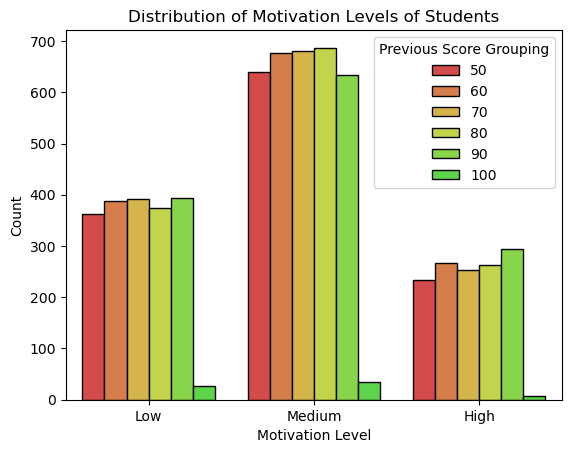

In [ ]:
motivationCountPlot = sns.countplot(data=data, x='Motivation Level', 
                                    palette=['#eb3434','#eb7a34','#ebc034','#d3eb34','#86eb34','#4ceb34'], 
                                    edgecolor='black', 
                                    hue='Previous Score Grouping')
motivationCountPlot.set(ylabel='Count',
                        title='Distribution of Motivation Levels of Students')
# Generating a bar graph showing how many students are in each motivation category
# I've also styled the graph to have a title, correct y-axis title, as well as colours to help visually distinguish between the score groupings
display(motivationCountPlot)

The graph shows us that most of the students that got 100 on the previous exam fall into the low and medium effory categories. This might imply that students that are exceptionally succeeding in the previous exam may already know the course content and that they do not need to put a lot of effort into relearning it. It may also be that case that these students feel they can put this course "on the backburner" and focus on other courses because they have already achieved the minimum grade to pass the course with the result of the previous exam. 
<br><br>
The other previous score groupings seem to be spread very similarly to each other without an obvious pattern among the motivation levels. This seems to imply that for this population of students, there is not really a sweeping relationship between the previous score a student earned and their current motivation level.
<br><br>
I had initially expected to find that students that previously received a low score would tend to have a high motivation to complete the course work to help ensure that they passed, and that students that previously received a high score would have a low or medium level of motivation to complete course work since their exam score implies that they are understanding the course content well. 

#### *Looking More Specifically at the Students in the 50% Previous Score Grouping*
